# Plot number of lanes
- This script is used to plot global number of lanes based on CTSM's defualt input data.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.colors import LinearSegmentedColormap, Normalize
home_path = '/gws/nopw/j04/duicv/yuansun/'
import matplotlib.colors as mcolors

In [2]:
ds_surf = xr.open_dataset(f'{home_path}dataset/inputdata/lnd/clm2/surfdata_esmf/ctsm5.2.0/surfdata_0.9x1.25_hist_2000_78pfts_c240216.nc')
ds_surf

<xarray.Dataset> Size: 2GB
Dimensions:                  (lsmlat: 192, lsmlon: 288, nlevsoi: 10,
                              numurbl: 3, numrad: 2, nlevurb: 10, nglcecp1: 11,
                              nglcec: 10, cft: 64, natpft: 15, time: 12,
                              lsmpft: 79)
Coordinates:
  * natpft                   (natpft) int32 60B 0 1 2 3 4 5 ... 9 10 11 12 13 14
  * cft                      (cft) int32 256B 15 16 17 18 19 ... 74 75 76 77 78
  * time                     (time) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lsmlat, lsmlon, nlevsoi, numurbl, numrad,
                                nlevurb, nglcecp1, nglcec, lsmpft
Data variables: (12/86)
    LONGXY                   (lsmlat, lsmlon) float64 442kB ...
    LATIXY                   (lsmlat, lsmlon) float64 442kB ...
    mxsoil_color             int32 4B ...
    SOIL_COLOR               (lsmlat, lsmlon) int32 221kB ...
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float32 2MB ...
    PCT_CLAY                 (nlevsoi, lsmlat, lsmlon) float32 2MB ...
    ...                       ...
    PCT_NAT_PFT              (natpft, lsmlat, lsmlon) float64 7MB ...
    PCT_CFT                  (cft, lsmlat, lsmlon) float64 28MB ...
    MONTHLY_LAI              (time, lsmpft, lsmlat, lsmlon) float64 419MB ...
    MONTHLY_SAI              (time, lsmpft, lsmlat, lsmlon) float64 419MB ...
    MONTHLY_HEIGHT_TOP       (time, lsmpft, lsmlat, lsmlon) float64 419MB ...
    MONTHLY_HEIGHT_BOT       (time, lsmpft, lsmlat, lsmlon) float64 419MB ...
Attributes: (12/47)
    Conventions:                              NCAR-CESM
    History_Log:                              created on: 02-16-24 20:15:42
    Source:                                   Community Land Model: CLM5
    Version:                                  alpha-ctsm5.2.mksrf.21_ctsm5.1....
    Logname:                                  slevis
    Host:                                     derecho6
    ...                                       ...
    lai_raw_data_file_name:                   mksrf_pftlaihgt_ctsm52_histLUH2...
    soil_color_raw_data_file_name:            mksrf_soilcolor_ctsm52_histLUH2...
    soil_texture_mapunit_raw_data_file_name:  mksrf_soil_mapunits_5x5min_WISE...
    soil_texture_lookup_raw_data_file_name:   mksrf_soil_lookup.10level.WISE....
    fmax_raw_data_file_name:                  mksrf_fmax_0.125x0.125_c200220.nc
    VOC_EF_raw_data_file_name:                mksrf_vocef_0.5x0.5_simyr2000.c...

In [3]:
road_width = ds_surf['HT_ROOF'] / ds_surf['CANYON_HWR']
improad_width = road_width * (1 - ds_surf['WTROAD_PERV'])
improad_width

<xarray.DataArray (numurbl: 3, lsmlat: 192, lsmlon: 288)> Size: 1MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Dimensions without coordinates: numurbl, lsmlat, lsmlon

In [8]:
lat = ds_surf['LATIXY'][:,0].values
lon = ds_surf['LONGXY'][0,:].values
length = 4
labelcolor = '#6b6b6b'
proj = ccrs.PlateCarree()
extent = [-180,180,-60,90]
yticks = range(extent[-2], extent[-1]+1, 30)
map_xtick = [-135,  -90,  -45,    0,   45,   90,  135]
title_list = ['(a) Tall building district', '(b) High density', '(c) Medium density']
fontsize = 6
labelsize = 6
pad = 2
xwidth = 0.5
boundarywidth = 0.5
#levels = np.array([0, 1, 2, 3, 4, 5, 6, 7])
levels = np.array([0, 1, 2, 4, 6, 8])
cmap = plt.get_cmap('rainbow', len(levels))
discrete_cmap = mcolors.ListedColormap([cmap(i) for i in range(len(levels))])
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=len(levels))
linewidth = 0.5
lane_width = 3.5
land_mask = improad_width[0].where(improad_width[0] > 0)
nlane = xr.DataArray(np.zeros_like(improad_width), coords=improad_width.coords)
nlane = xr.where(improad_width / lane_width < 0.5, 0, nlane)
nlane = xr.where((improad_width / lane_width >= 0.5) & (improad_width / lane_width < 1), 1, nlane)
#nlane = xr.where(improad_width / lane_width >= 1, improad_width // lane_width, nlane)
lane_count = improad_width // lane_width
adjusted_lane_count = xr.where(lane_count % 2 == 1, lane_count - 1, lane_count)
nlane = xr.where(improad_width / lane_width >= 1, adjusted_lane_count, nlane)
nlane = xr.where(np.isnan(land_mask), np.nan, nlane)

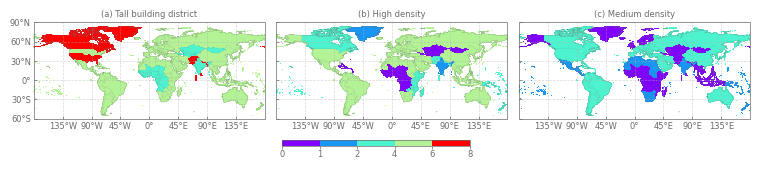

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(7.5, 1.5), subplot_kw={'projection': proj})
ax = axes.flatten()
for i in range(3):
    #improad_width_lnd = improad_width[i] // 3.5
    colormesh = ax[i].pcolormesh(lon, lat, nlane.sel(numurbl=i), cmap=discrete_cmap, norm=norm, transform=proj)
    ax[i].set_ylim(extent[-2], extent[-1])
    ax[i].set_xlim(extent[0], extent[1])
    ax[i].set_yticks(yticks, crs = proj)
    ax[i].yaxis.set_major_formatter(LatitudeFormatter())
    ax[i].set_xticks(map_xtick, crs = proj)
    ax[i].xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax[i].set_title(title_list[i], fontsize=fontsize, pad=pad*2, color = labelcolor)
    #ax[i].text(-0.075, 1.15, title_list[i], transform=ax[i].transAxes, fontsize=fontsize,  fontweight='bold', va='top', ha='left')
    ax[i].tick_params(axis='x', which='both', bottom = True, top = False, labelbottom=True, colors=labelcolor, labelsize=labelsize, pad=pad, width=xwidth,length=length/2, direction='in')
    if i == 0:
        ax[i].tick_params(axis='y', which='both', left = True, right = False, labelleft=True, colors=labelcolor, labelsize=labelsize, pad=pad, width=xwidth,length=length/2, direction='in')
    else:
        ax[i].tick_params(axis='y', which='both', left = True, right = False, labelleft=False, colors=labelcolor, labelsize=labelsize, pad=pad, width=xwidth,length=length/2, direction='in')
    for spine in ax[i].spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)    
    ax[i].coastlines(resolution='110m',linestyle='dashed',linewidth=0.2,zorder=2,color=labelcolor,alpha=1, edgecolor=labelcolor)   
    ax[i].add_feature(cfeature.BORDERS,lw=0.1, linestyle='dashed', edgecolor=labelcolor,alpha=1) 
    ax[i].grid(True, which='both', axis='both',linestyle='--',linewidth=linewidth, alpha=0.5) 
cbar = plt.colorbar(colormesh, ax=ax, shrink=0.25, orientation='horizontal', location='bottom', pad=0.12, extend='neither', fraction=0.02, aspect=30)
cbar.ax.tick_params(length=2,labelsize=labelsize, pad = 1, width=boundarywidth, colors=labelcolor)
cbar.outline.set_linewidth(boundarywidth)
cbar.outline.set_edgecolor(labelcolor)
cbar.ax.yaxis.label.set_color(labelcolor)
#cbar.ax.set_xticks([vmin, (vmin + vmax)/2, vmax])
cbar.ax.set_position([0.366, -0.365, 0.25, 0.5]) #[left, top, width, height]   
#cbar.set_label('%', fontsize=labelsize, color=labelcolor)
cbar.ax.xaxis.set_label_coords(1.15, -0.5)    
plt.subplots_adjust(left=0.035, right=0.99, bottom=0.275, top=0.98, wspace=0.05)    
plt.savefig('nlane_traffic.png', dpi=300)
plt.savefig('nlane_traffic.pdf', dpi=600)

In [71]:
for i in range(3):
    improad_width_lnd = improad_width[i] // 3.5
    print(improad_width_lnd.min().values, improad_width_lnd.max().values)

2.0 6.0
0.0 5.0
0.0 3.0
